In [187]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Catheter.csv')
dataset.head()
print(dataset)

    Patient Height (inches)  Patient Weight (pounds)  Catheter Length (cm)
0                      42.8                     40.0                  37.0
1                      63.5                     93.5                  50.0
2                      37.5                     35.5                   NaN
3                      39.5                     30.0                  36.0
4                      45.5                     52.0                  43.0
5                      38.5                     17.0                  28.0
6                      43.0                     38.5                  37.0
7                      22.5                      8.5                  20.0
8                      37.0                     33.0                  34.0
9                      23.5                      9.5                  30.0
10                     33.0                     21.0                  38.0
11                     58.0                     79.0                  47.0


In [188]:
X = dataset.iloc[:, :1].values 
print(X)

[[42.8]
 [63.5]
 [37.5]
 [39.5]
 [45.5]
 [38.5]
 [43. ]
 [22.5]
 [37. ]
 [23.5]
 [33. ]
 [58. ]]


In [189]:
Y = dataset.iloc[:, 2:3].values
print(Y)

[[37.]
 [50.]
 [nan]
 [36.]
 [43.]
 [28.]
 [37.]
 [20.]
 [34.]
 [30.]
 [38.]
 [47.]]


In [190]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(Y)
Y = imputer.transform(Y)
print(Y)

[[37.        ]
 [50.        ]
 [36.36363636]
 [36.        ]
 [43.        ]
 [28.        ]
 [37.        ]
 [20.        ]
 [34.        ]
 [30.        ]
 [38.        ]
 [47.        ]]


In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train)
print(Y_train)

[[37.5]
 [37. ]
 [63.5]
 [22.5]
 [23.5]
 [39.5]
 [42.8]
 [38.5]]
[[36.36363636]
 [34.        ]
 [50.        ]
 [20.        ]
 [30.        ]
 [36.        ]
 [37.        ]
 [28.        ]]


In [192]:
print(X_test)
print(Y_test)

[[43. ]
 [58. ]
 [45.5]
 [33. ]]
[[37.]
 [47.]
 [43.]
 [38.]]


In [193]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train, Y_train)

0.8229105298716708

In [196]:
prediction = reg.predict(X)
print(prediction)

[[36.82301831]
 [49.60665023]
 [33.54991449]
 [34.78504801]
 [38.49044856]
 [34.16748125]
 [36.94653166]
 [24.2864131 ]
 [33.24113111]
 [24.90397986]
 [30.77086407]
 [46.21003305]]


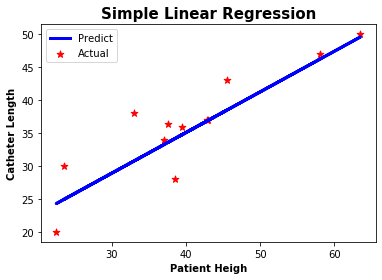

In [198]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, label = "Actual", color="red", marker= "*", s=50)
plt.plot(X, prediction, label = "Predict", color='blue', linewidth=3)
plt.xlabel('Patient Heigh', fontsize=10, fontweight='bold') 
plt.ylabel('Catheter Length', fontsize=10, fontweight='bold') 
plt.title('Simple Linear Regression',fontsize=15, fontweight='bold') 
plt.legend() 
plt.show() 